In [38]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors, cm
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
# from community import community_louvai
import os
import sys
sys.path.append('c:/Users/Saroj Chand/Documents/GitHub/nv-center-network-analysis')
from scripts.network_analysis import build_network, plot_network_coords, plot_correlations

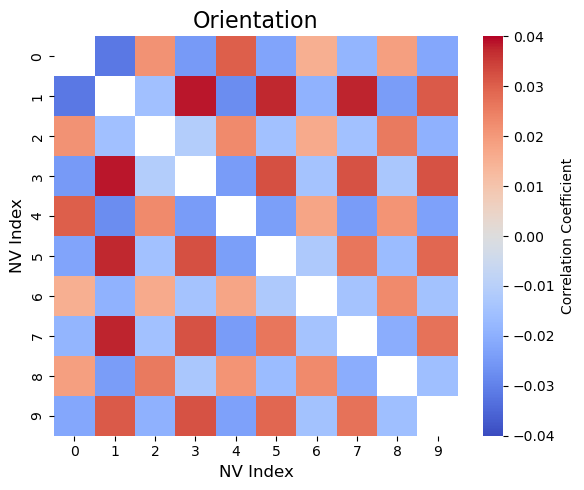

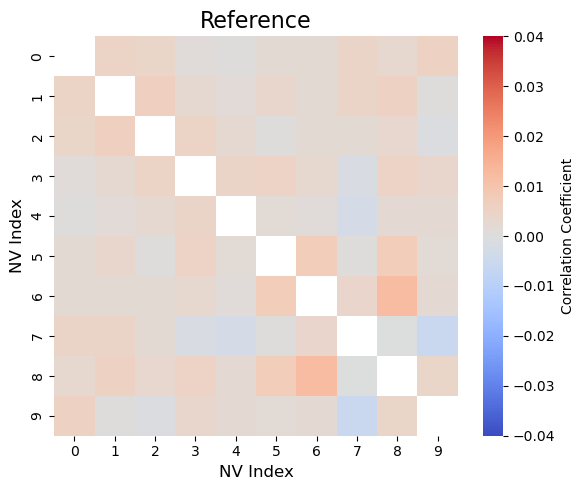

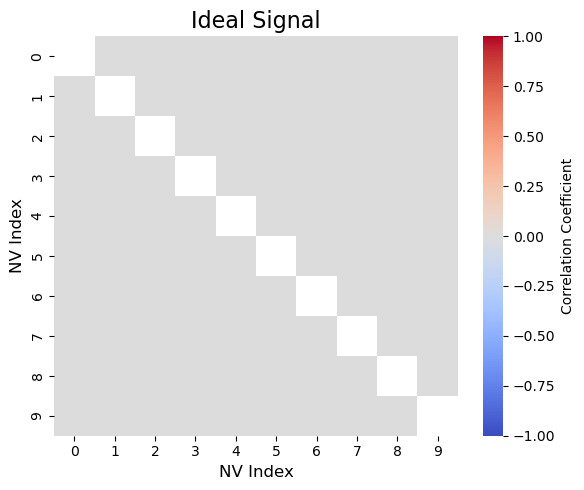

In [40]:
# Load correlation matrices
output_dir = '../data/correlation_matrix/checkerboard_1538271354881'
corr_matrix_sig = np.load(os.path.join(output_dir, 'sig_corr_coeffs.npy'))
corr_matrix_ref = np.load(os.path.join(output_dir, 'ref_corr_coeffs.npy'))
corr_matrix_ideal = np.load(os.path.join(output_dir, 'ideal_sig_corr_coeffs.npy'))

# Plot networks with the same color scale based on G_sig
fig_sig_matrix = plot_correlations(corr_matrix_sig, title="Orientation", vmin=-0.04,vmax=0.04)
fig_ref_matrix = plot_correlations(corr_matrix_ref, title="Reference", vmin=-0.04,vmax=0.04)
fig_ideal_matrix = plot_correlations(corr_matrix_ideal, title="Ideal Signal", vmin=-1,vmax=1)
# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the figures separately with transparent background and high resolution
fig_sig_matrix.savefig(os.path.join(output_dir, "signal_matrix.png"), transparent=True, dpi=720)
fig_ref_matrix.savefig(os.path.join(output_dir, "reference_matrix.png"), transparent=True, dpi=720)
fig_ideal_matrix.savefig(os.path.join(output_dir, "ideal_sig_matrix.png"), transparent=True, dpi=300)

In [ ]:
# Build and plot networks for both reference and signal correlation matrices
threshold = 0

# NV coordinates (pixels)
coords = [
    [131.144, 129.272]
    [161.477, 105.335]
    [135.139, 104.013]
    [110.023, 87.942]
    [144.169, 163.787]
    [173.93, 78.505]
    [171.074, 49.877]
    [170.501, 132.597]
    [137.025, 74.662]
    [58.628, 139.616]
]

# coords = np.flip(coords)

G_sig = build_network(corr_matrix_sig, threshold)
G_ref = build_network(corr_matrix_ref, threshold)
G_ideal = build_network(corr_matrix_ideal, threshold)

print("Reference Counts Correlation Network:")

# Calculate normalization based on G_sig
weights_sig = [G_sig[u][v]['weight'] for u, v in G_sig.edges()]
min_weight = -0.04 #min(weights_sig)
max_weight = 0.04 #max(weights_sig)

# Create a normalization and colormap
norm = mcolors.Normalize(vmin=min_weight, vmax=max_weight)
cmap = cm.coolwarm

# Plot networks with the same color scale based on G_sig
# Plot networks with the same color scale based on G_sig
fig_sig = plot_network_coords(G_sig, coords, norm, cmap, title="Orientation Network")
fig_ref = plot_network_coords(G_ref, coords, norm, cmap, title="Reference Network")
fig_ideal = plot_network_coords(G_ideal, coords, norm, cmap, title="Reference Network")
# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the figures separately with transparent background and high resolution
if fig_sig:
    fig_sig.savefig(os.path.join(output_dir, "signal_network.png"), transparent=True, dpi=300)
if fig_ref:
    fig_ref.savefig(os.path.join(output_dir, "reference_network.png"), transparent=True, dpi=300)
if fig_ideal:
    fig_ideal.savefig(os.path.join(output_dir, "ideal_network.png"), transparent=True, dpi=300)


# Show the figures
plt.show(fig_sig)
plt.show(fig_ref)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Example graph construction with signed edges
# Add nodes and edges based on correlation matrix with weights
# Example: G_sig.add_edge(0, 1, weight=-0.5) for anticorrelation

# Compute signed Laplacian matrix
L_sig = nx.laplacian_matrix(G_sig).todense()

# Calculate eigenvalues and eigenvectors
eigenvalues_sig, eigenvectors_sig = np.linalg.eigh(L_sig)

# Sorting eigenvalues and keeping track of indices
sorted_indices = np.argsort(eigenvalues_sig)
sorted_eigenvalues = eigenvalues_sig[sorted_indices]

# Plotting the eigenvalues with NV center indices
plt.figure(figsize=(8, 6))
plt.plot(sorted_eigenvalues, 'o-')

# Annotate each point with the corresponding NV center index
for i, eigenvalue in enumerate(sorted_eigenvalues):
    plt.annotate(f'NV{sorted_indices[i]}', (i, eigenvalue), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Spectral Graph Analysis with NV Center Indices (Signed Laplacian)')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.show()

In [ ]:
# 7. Spectral Graph Analysis
L = nx.laplacian_matrix(G_ref).todense()
eigenvalues, _ = np.linalg.eigh(L)
plt.figure(figsize=(6, 6))
plt.plot(eigenvalues, 'o-')
plt.title('Spectral Graph Analysis')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.show()

In [ ]:
# 6. Graph Topological Features
clustering_coeff = nx.average_clustering(G_sig)
path_length = nx.average_shortest_path_length(G_ref)
print(f'Clustering Coefficient: {clustering_coeff}')
print(f'Average Path Length: {path_length}')

In [ ]:
# 8. Correlation Decay with Distance
num_nv = 10
positions = coords
correlations = corr_matrix_sig
distances = squareform(pdist(positions))
correlation_values = correlations[np.triu_indices(num_nv, 1)]
distance_values = distances[np.triu_indices(num_nv, 1)]

plt.figure(figsize=(8, 6))
plt.scatter(distance_values, correlation_values, alpha=0.7)
plt.title('Correlation Decay with Distance')
plt.xlabel('Distance')
plt.ylabel('Correlation')
plt.show()


In [ ]:
# 2. Correlation Strength Distribution
plt.figure(figsize=(8, 6))
sns.histplot(list(nx.get_edge_attributes(G_sig, 'weight').values()), bins=10, kde=True)
plt.title('Correlation Strength Distribution')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# plot_degree_distribution(G_diff,G_diff)
# plot_clustering_coefficient(G_diff,G_diff)
# plot_shortest_path_length(G_diff,G_diff)
plot_community_detection(G_diff,G_diff)
# plot_network_with_communities(G_diff, decimal_places=3)
# plot_centrality_measures(G_diff,G_diff)

In [ ]:
# Partition the correlation matrix based on sequence stages
# Assuming each stage affects a specific subset of NV centers, we'll create masks
stage_masks = {
    'initial': np.ix_([0, 1, 2, 3, 4], [0, 1, 2, 3, 4]),  # First 5 NVs
    'post_scc1': np.ix_([0, 1, 2, 3, 4], [5, 6, 7, 8, 9]),  # Between first 5 and last 5 NVs
    'post_mw_a': np.ix_([5, 6, 7, 8, 9], [5, 6, 7, 8, 9]),  # Last 5 NVs
    'post_mw_b': np.ix_([0, 1, 2, 3, 4], [5, 6, 7, 8, 9]),  # Between first 5 and last 5 NVs after MW B
    # 'final': np.ix_([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
    'final': np.ix_([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # all 10 NVs in final state
}

# Function to extract and plot correlations for each stage
def plot_stage_correlations(corr_matrix, stage_masks, stage_name):
    stage_corr = corr_matrix[stage_masks[stage_name]]
    plt.figure(figsize=(6, 5))
    sns.heatmap(stage_corr, annot=False, cmap='coolwarm', center=0)
    plt.title(f'Correlation Matrix: {stage_name}')
    plt.show()
    return stage_corr

# Plot correlation matrices for each stage
corr_matrix = correlation_matrix_sig
stage_correlations = {}
for stage in stage_masks:
    stage_correlations[stage] = plot_stage_correlations(corr_matrix, stage_masks, stage)


In [ ]:
# Quantify changes between stages
def quantify_changes(stage_correlations):
    changes = {}
    stages = list(stage_correlations.keys())
    for i in range(len(stages) - 1):
        stage1 = stages[i]
        stage2 = stages[i + 1]
        change = np.abs(stage_correlations[stage1] - stage_correlations[stage2])
        changes[f'{stage1} to {stage2}'] = np.mean(change)
    return changes

# Calculate and print changes between stages
changes_between_stages = quantify_changes(stage_correlations)
for stage_transition, change in changes_between_stages.items():
    print(f'Average Correlation Change from {stage_transition}: {change}')

# Visualize temporal changes in correlations
def plot_correlation_changes(changes_between_stages):
    plt.figure(figsize=(8, 6))
    transitions = list(changes_between_stages.keys())
    changes = list(changes_between_stages.values())
    plt.plot(transitions, changes, marker='o')
    plt.title('Temporal Changes in Correlations')
    plt.xlabel('Stage Transitions')
    plt.ylabel('Average Correlation Change')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

plot_correlation_changes(changes_between_stages)

print("Temporal correlation analysis complete.")

## Network Analysis

After constructing a graph network based on correlation matrices, we have the opportunity to investigate the structure and characteristics of the network. Here's a breakdown of potential analyses we can conduct in a Jupyter Notebook:

### 1. Basic Network Properties
- **Degree Distribution**: Investigate how node degrees are distributed throughout the network to understand its overall connectivity.
- **Clustering Coefficient**: Examine the tendency of nodes to form clusters or triangles, providing insights into the network's local structure.
- **Shortest Path Length**: Calculate the average shortest path length to gauge the efficiency of information flow within the network.

### 2. Community Detection
- **Modularity and Communities**: Employ algorithms such as the Louvain method or Girvan-Newman to identify distinct communities within the network, revealing clusters of highly interconnected nodes.
- **Community Structure**: Analyze the characteristics of individual communities, including their size, density, and connections to other communities.

### 3. Centrality Measures
- **Degree Centrality**: Identify nodes with the highest number of connections.
- **Betweenness Centrality**: Pinpoint nodes that serve as crucial bridges between different parts of the network.
- **Closeness Centrality**: Determine nodes that can efficiently interact with other nodes.
- **Eigenvector Centrality**: Highlight nodes that are connected to other highly connected nodes.

### 4. Network Robustness and Resilience
- **Attack and Failure Analysis**: Assess how the network's connectivity and structure are affected by removing nodes or edges.
- **Percolation Theory**: Study the network's behavior under random failures or targeted attacks.

### 5. Temporal Analysis
- If the data includes timestamps, explore how the network evolves over time, including changes in node properties, community structure, and centrality measures.

### 6. Visualization
- **3D Visualization**: Utilize 3D visualization tools to visualize complex network structures more effectively.
- **Interactive Visualization**: Employ tools like Gephi or interactive plots in Jupyter Notebooks for dynamic exploration of the network.

By conducting these analyses, we can gain deeper understanding the underlying structure, properties, and dynamics of the network.
